# Retail Sales Prediction

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
train=pd.read_csv(r"C:\Users\samya\Downloads\archive\Train.csv")
test=pd.read_csv(r"C:\Users\samya\Downloads\archive\Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Checking for the missing values

In [3]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Thus,  there are missing values in the 'Item_Weight' and 'Outlet_Size' columns in both train and test datasets which we are going to fill with mean and mode respectively.

### 'Item_Weight'

In [5]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)

In [6]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)

### 'Outlet_Size'

In [7]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [8]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

## Univariate Analysis

### 'Item_Identifier'

In [9]:
train["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
FDQ40     9
FDV38     9
DRE49     9
         ..
FDY43     1
FDT35     1
FDO33     1
DRF48     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
test["Item_Identifier"].value_counts()

NCS41    8
FDQ60    8
DRF48    8
FDZ50    8
FDW10    8
        ..
FDO32    1
FDC29    1
NCM07    1
FDL20    1
FDK20    1
Name: Item_Identifier, Length: 1543, dtype: int64

### 'Item_Weight'

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

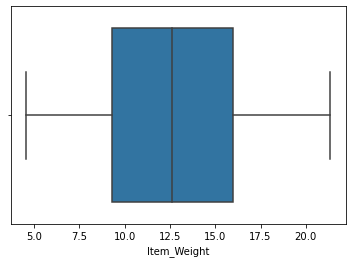

In [11]:
sb.boxplot("Item_Weight",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

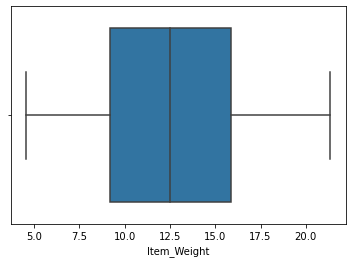

In [12]:
sb.boxplot("Item_Weight",data=test)

#### Thus, no outliers in 'Item_Weight'

### 'Item_Fat_content'

In [13]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat")

In [15]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular")

In [16]:
test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [17]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat")

In [18]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular")

#### All the errors are corrected

### 'Item_Visibility'

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

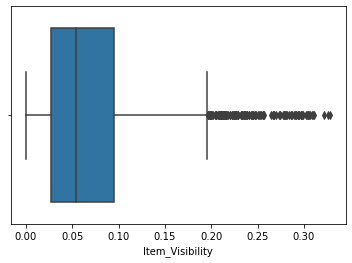

In [19]:
sb.boxplot("Item_Visibility",data=train)

In [20]:
train["Item_Visibility"].loc[train["Item_Visibility"]>0.2]=0.05

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

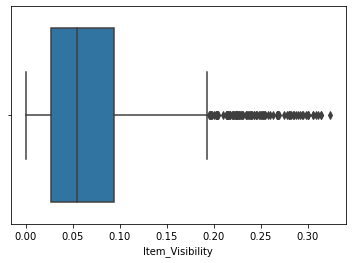

In [21]:
sb.boxplot("Item_Visibility",data=test)

In [22]:
test["Item_Visibility"].loc[test["Item_Visibility"]>0.2]=0.05

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Thus, the outliers in 'Item_Visibility' are replaced with the median.

### 'Item_Type'

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

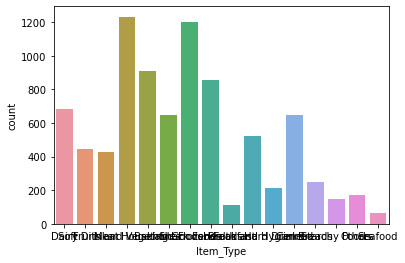

In [23]:
sb.countplot(x="Item_Type",data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

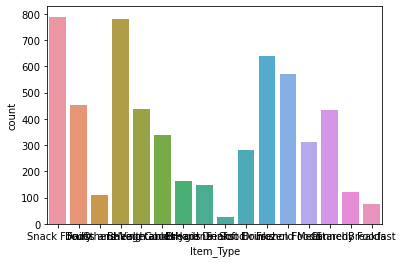

In [24]:
sb.countplot(x="Item_Type",data=test)

#### There are no errors in 'Item_Type'
### 'Item_MRP'

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

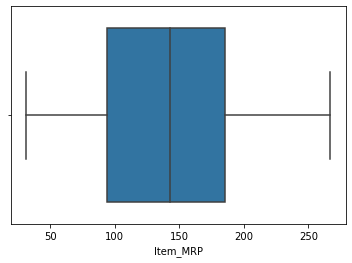

In [25]:
sb.boxplot("Item_MRP",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

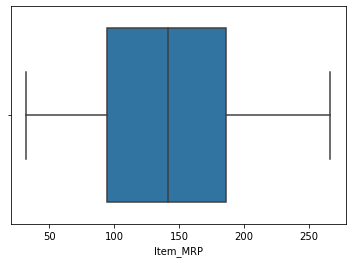

In [26]:
sb.boxplot("Item_MRP",data=test)

#### There are no outliers in 'Item_MRP'
### 'Outlet_Identifier'

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

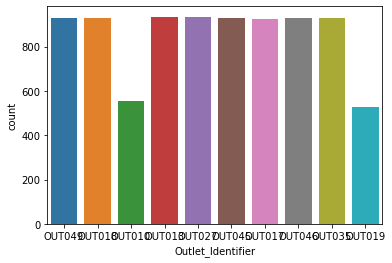

In [27]:
sb.countplot(x="Outlet_Identifier",data=train)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

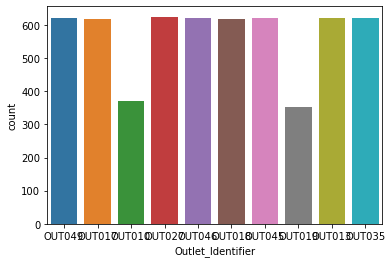

In [28]:
sb.countplot(x="Outlet_Identifier",data=test)

#### There are no errors in 'Outlet_Identifier'
### 'Outlet_Establishment_Year'

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

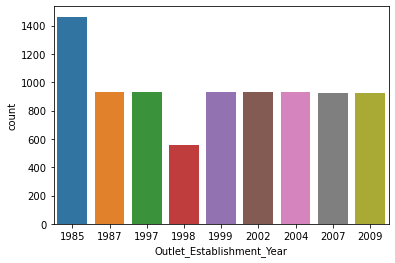

In [29]:
sb.countplot(x="Outlet_Establishment_Year",data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

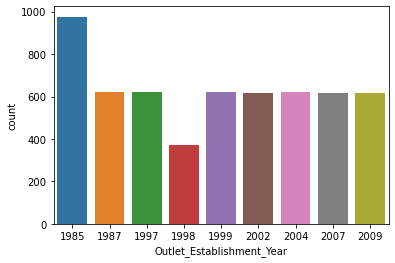

In [30]:
sb.countplot(x="Outlet_Establishment_Year",data=test)

#### As we can see, All the outlets are equal in count but the outlets established in 1985 are higher than the ones in 1998.
### 'Outlet_Size'

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

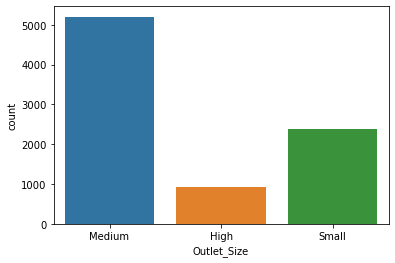

In [31]:
sb.countplot(x="Outlet_Size",data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

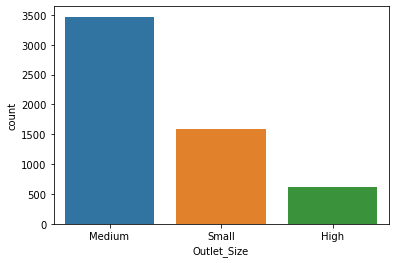

In [32]:
sb.countplot(x="Outlet_Size",data=test)

#### Medium outlets are higher than Small and High.
### 'Outlet_Location_Type'

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

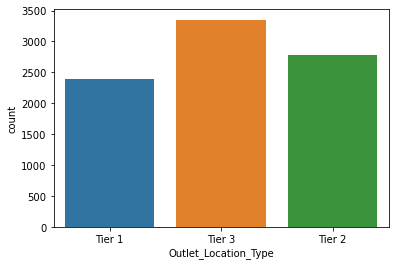

In [33]:
sb.countplot(x="Outlet_Location_Type",data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

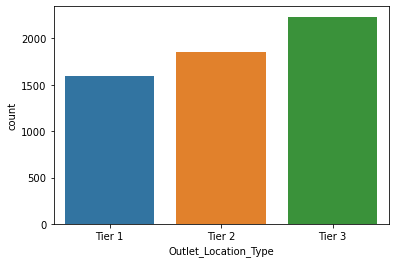

In [34]:
sb.countplot(x="Outlet_Location_Type",data=test)

#### Tier 3 is the highest while Tier 1 is the lowest in count.
### 'Outlet_Type'

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

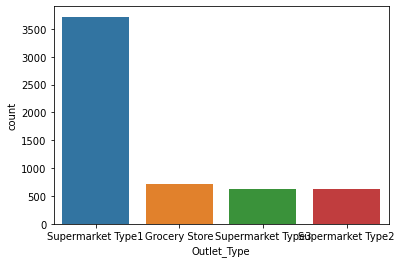

In [35]:
sb.countplot(x="Outlet_Type",data=test)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

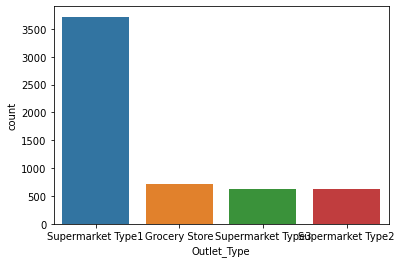

In [36]:
sb.countplot(x="Outlet_Type",data=test)

#### Supermarket Type 1 is very high in count than the other almost equally distributed outlets.

## Bivariate Analysis between the target 'Item_Outlet_Sales'

### 'Item_Weight'

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

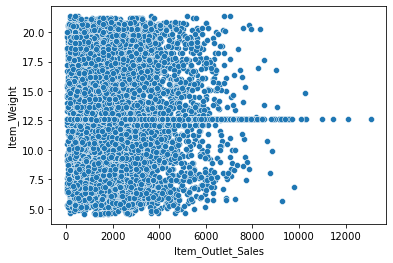

In [37]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_Weight",data=train)

#### Thus, there is no specific relation between the two.
### 'Item_Fat_Content'

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

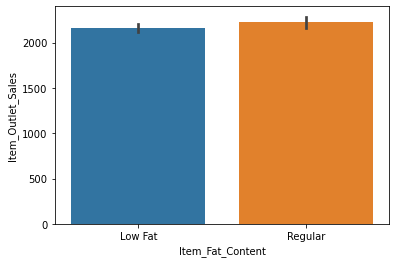

In [38]:
sb.barplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)

#### Thus, Low Fat and Regular are almost equally distributed.
### 'Item_Visibility'

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

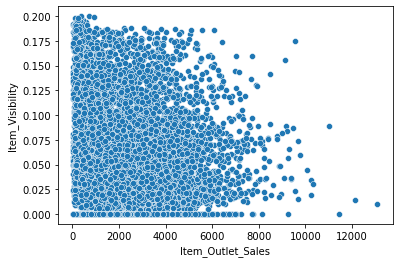

In [39]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=train)

#### There is no specific relation between the two
### 'Item_Type'

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

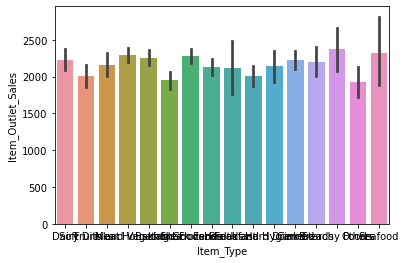

In [40]:
sb.barplot(x="Item_Type",y="Item_Outlet_Sales",data=train)

#### So, for different food type there are different outlet sales.
### 'Item_MRP'

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

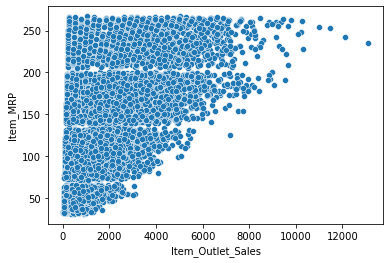

In [41]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_MRP",data=train)

#### There is almost a linear relationship between the two.
### 'Outlet_Identifier'

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

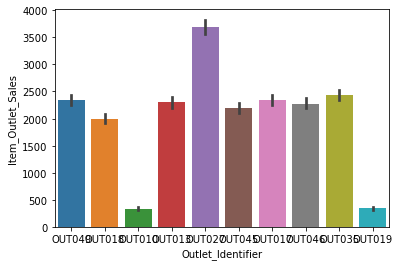

In [42]:
sb.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=train)

#### So, for different outlets there are different outlet sales.
### 'Outlet_Establishment_Year'

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

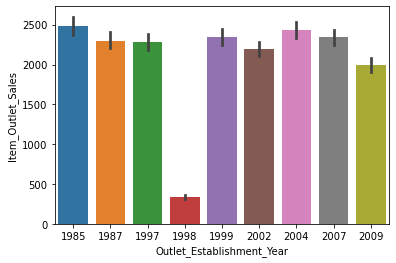

In [43]:
sb.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=train)

#### All the outlets have a good average outlet sales except the ones established in 1998.

### 'Outlet_Size'

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

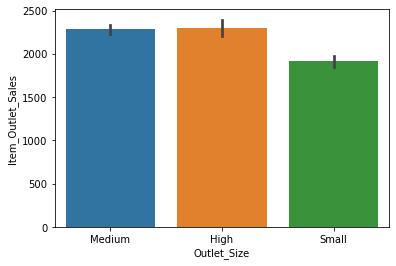

In [44]:
sb.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train)

#### As we can see, the small outlets have lower and the high outlets have higher outlet sales.
### 'Outlet_Location_Type'

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

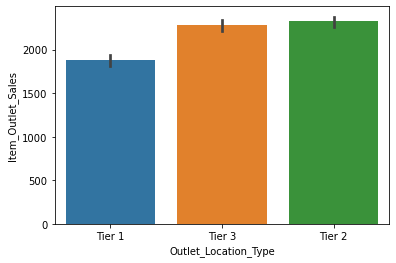

In [45]:
sb.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=train)

#### Tier 2 and 3 have almost equal average outlet sales but Tier 1 has a bit lesser.

### 'Outlet_Type'

<AxesSubplot:ylabel='Item_Outlet_Sales'>

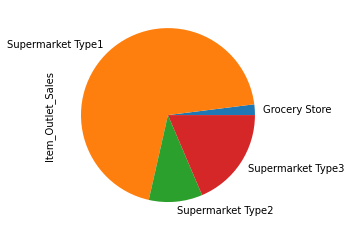

In [46]:
pie_train=train.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()
pie_train.plot.pie()

#### Supermarket 3 type have a lot higher while Grocery Stores have very less average outlet sales.

## Encoding the Categorical variables

In [47]:
train.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
train["Item_Fat_Content"]=le.fit_transform(train["Item_Fat_Content"])
train["Item_Type"]=le.fit_transform(train["Item_Type"])
train["Outlet_Identifier"]=le.fit_transform(train["Outlet_Identifier"])
train["Outlet_Establishment_Year"]=le.fit_transform(train["Outlet_Establishment_Year"])
train["Outlet_Size"]=le.fit_transform(train["Outlet_Size"])
train["Outlet_Location_Type"]=le.fit_transform(train["Outlet_Location_Type"])
train["Outlet_Type"]=le.fit_transform(train["Outlet_Type"])
train["Item_Identifier"]=le.fit_transform(train["Item_Identifier"])

In [50]:
test["Item_Fat_Content"]=le.fit_transform(test["Item_Fat_Content"])
test["Item_Type"]=le.fit_transform(test["Item_Type"])
test["Outlet_Identifier"]=le.fit_transform(test["Outlet_Identifier"])
test["Outlet_Establishment_Year"]=le.fit_transform(test["Outlet_Establishment_Year"])
test["Outlet_Size"]=le.fit_transform(test["Outlet_Size"])
test["Outlet_Location_Type"]=le.fit_transform(test["Outlet_Location_Type"])
test["Outlet_Type"]=le.fit_transform(test["Outlet_Type"])
test["Item_Identifier"]=le.fit_transform(test["Item_Identifier"])

## High Correlation filter

In [51]:
corr_test=test.corr().abs()
corr_test=corr_test.where(np.triu(np.ones(corr_test.shape),k=1).astype(np.bool))
corr_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,NaN,0.051378,0.105690,0.063521,0.003236,0.007537,0.010162,0.013450,0.004379,0.011657,0.009553
Item_Weight,NaN,NaN,0.043486,0.016688,0.029781,0.045048,0.020311,0.023425,0.012230,0.012969,0.002043
Item_Fat_Content,NaN,NaN,NaN,0.028859,0.160149,0.019244,0.003881,0.003311,0.000652,0.005827,0.003864
Item_Visibility,NaN,NaN,NaN,NaN,0.035299,0.004817,0.053455,0.050821,0.021221,0.010765,0.053014
Item_Type,NaN,NaN,NaN,NaN,NaN,0.060990,0.000333,0.001545,0.003729,0.000584,0.006179
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,0.006412,0.005532,0.011717,0.001754,0.003326
Outlet_Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030916,0.504545,0.716113,0.099937
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070810,0.041714,0.040576
Outlet_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614284,0.201538
Outlet_Location_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467299


In [52]:
drop_test=[column for column in corr_test.columns if any(corr_test[column]>0.5)]
test=test.drop(test[drop_test],axis=1)

In [53]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,4,1
1,1067,8.300,1,0.038428,4,87.3198,2,7,1
2,1406,14.600,0,0.099575,11,241.7538,0,3,0
3,809,7.315,0,0.015388,13,155.0340,2,7,1
4,1184,12.500,1,0.118599,4,234.2300,5,0,3


#### Thus, 'Outlet_Size' and 'Outlet_Location_type' are the two dependent variables which are dropped by the high correlation filter. Therefore, we have to drop them in the train data too.

In [54]:
train=train.drop("Outlet_Size",axis=1)
train=train.drop(["Outlet_Location_Type"],axis=1)

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,4,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,8,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,4,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,3,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1,1,994.7052


## Converting train data into x and y

In [56]:
x=train.drop(["Item_Outlet_Sales"],axis=1)
y=train["Item_Outlet_Sales"]

## Scaling the data

In [57]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()

scaled_x=mms.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

scaled_test=mms.fit_transform(test)
test=pd.DataFrame(scaled_test,columns=test.columns)

In [58]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,-1.388514,-0.831187,-0.738147,-1.021066,-0.766479,1.747454,1.507813,0.076668,-0.252658
1,-1.717991,-1.630810,1.354743,-0.950826,1.608963,-1.489023,-0.607071,1.541783,1.002972
2,-0.262057,1.108727,-0.738147,-1.005570,0.658786,0.010040,1.507813,0.076668,-0.252658
3,0.759769,1.510904,1.354743,-1.369934,-0.291391,0.660050,-1.664513,-0.289611,-1.508289
4,1.151580,-0.918719,-0.738147,-1.369934,0.421242,-1.399220,-1.312032,-1.022168,-0.252658


In [59]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [60]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,0.739896,1.905090,-0.740811,-1.221691,1.366916,-0.536555,1.507689,0.077048,-0.252769
1,0.659085,-1.027457,1.349873,-0.529235,-0.766450,-0.868937,-0.959749,1.175901,-0.252769
2,1.420050,0.456482,-0.740811,0.842698,0.892835,1.629848,-1.664731,-0.289236,-1.507994
3,0.079943,-1.259469,-0.740811,-1.046157,1.366916,0.226697,-0.959749,1.175901,-0.252769
4,0.921719,-0.038164,1.349873,1.269541,-0.766450,1.508110,0.097725,-1.388089,2.257683


## Evaluation Metric

In [61]:
from sklearn.metrics import mean_squared_log_error as mse
def error(true,pred):
    return np.sqrt(mse(true,pred))

## Creating train and test data for x and y

In [62]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=20)

In [63]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((6392, 9), (6392,), (2131, 9), (2131,))

## Model Building

### LinearRegression

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(train_x,train_y)

plr=lr.predict(test_x)
plr=pd.DataFrame(plr,columns=["pred"])
plr["pred"]=plr["pred"].apply(lambda x:0 if x<0 else x)

error_lr=error(test_y,plr)
error_lr

0.9748697736657831

In [65]:
pred_lr=lr.predict(test)
pred_lr=pd.DataFrame(pred_lr,columns=["pred"])

### KNNRegressor

In [66]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=7)

kn.fit(train_x,train_y)

pkn=kn.predict(test_x)
pkn=pd.DataFrame(pkn,columns=["pred"])

error_kn=error(test_y,pkn)
error_kn

0.5883129000962176

In [67]:
pred_kn=kn.predict(test)
pred_kn=pd.DataFrame(pred_kn,columns=["pred"])

### DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=7)

dt.fit(train_x,train_y)

pdt=dt.predict(test_x)
pdt=pd.DataFrame(pdt,columns=["pred"])

error_dt=error(test_y,pdt)
error_dt

0.5412871184548835

In [69]:
pred_dt=dt.predict(test)
pred_dt=pd.DataFrame(pred_dt,columns=["pred"])

### RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=7)

rf.fit(train_x,train_y)

prf=rf.predict(test_x)
prf=pd.DataFrame(prf,columns=["pred"])

error_rf=error(test_y,prf)
error_rf

0.527768553945892

In [71]:
pred_rf=rf.predict(test)
pred_rf=pd.DataFrame(pred_rf,columns=["pred"])

### XGBRegressor

In [72]:
from xgboost import XGBRegressor
xr=XGBRegressor(max_depth=7)

xr.fit(train_x,train_y)

pxr=xr.predict(test_x)
pxr=pd.DataFrame(pxr,columns=["pred"])
pxr["pred"]=pxr["pred"].apply(lambda x:0 if x<0 else x)

error_xr=error(test_y,pxr)
error_xr

0.8456881614936911

In [73]:
pred_xr=xr.predict(test)
pred_xr=pd.DataFrame(pred_xr,columns=["pred"])
pred_xr["pred"]=pred_xr["pred"].apply(lambda x:0 if x<0 else x)

## Ensembling the models

In [74]:
from statistics import mean
pred_ens=np.array([])
for i in range(0,len(test_x)):
    pred_ens=np.append(pred_ens,mean([prf["pred"][i],prf["pred"][i],prf["pred"][i],pkn["pred"][i],pdt["pred"][i],pdt["pred"][i]]))
error_ens=error(test_y,pred_ens)
error_ens

0.5336128094658033

## Graph between test_y and pred_y

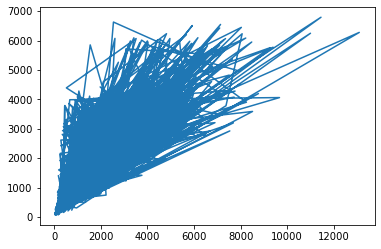

In [75]:
import matplotlib.pyplot as plt
plt.plot(test_y,pred_ens)

In [76]:
final_prediction=np.array([])
for i in range(0,len(test)):
    final_prediction=np.append(final_prediction,mean([pred_rf["pred"][i],pred_rf["pred"][i],pred_rf["pred"][i],pred_kn["pred"][i],pred_dt["pred"][i],pred_dt["pred"][i]]))

final_prediction=pd.DataFrame(final_prediction,columns=["pred"])
final_prediction["pred"]=final_prediction["pred"].apply(lambda x:100 if x<0 else x)
final_prediction.head()

,pred
0,1604.725881
1,1469.904366
2,629.656197
3,2371.859650
4,5957.400192


#### Thus, final_prediction depicts the final Retail Sales prediction